<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/Fruit_Classification_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers

In [105]:
names = os.listdir("/content/drive/MyDrive/fruit dataset")
names

['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges',
 '.ipynb_checkpoints']

In [106]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(849, 200, 200, 3)
(849,)


In [107]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)


(849, 200, 200, 3)
(849,)


In [108]:
y = to_categorical(y)
print(y.shape)

(849, 6)


In [109]:
x = x/255

# CNN

In [110]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [111]:
model = models.Sequential()
model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(80,(3,3),activation='relu'))
model.add(layers.Conv2D(100,(3,3),activation='relu'))
model.add(layers.Conv2D(120,(3,3),activation='relu'))
model.add(layers.Conv2D(140,(3,3),activation='relu'))
model.add(layers.Conv2D(160,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))


In [112]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [178]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, #Scale the image between 0 and 1
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,)


In [179]:
train_datagen = ImageDataGenerator(rescale=1./255 )
val_datagen = ImageDataGenerator(rescale=1./255)

In [185]:
#Create the image generators
batch_size = 32
train_generator = train_datagen.flow(xtrain, ytrain, batch_size=batch_size)
val_generator = val_datagen.flow(xtest, ytest, batch_size=batch_size)


In [181]:
ntrain = len(xtrain)
nval = len(xtest)
print(ntrain)
print(nval)


679
170


In [186]:
# Function for plots images with labels within jupyter notebook
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
#Check the training set (with batch of 10 as defined above
# imgs, labels = next(train_generator)
# #Images are shown in the output
# plots(imgs, titles=labels)
# #Images Classes with index

# print(train_generator.index_generator)

In [118]:
history = model.fit_generator(train_generator,
 steps_per_epoch=ntrain // batch_size,
 epochs=20,
 validation_data=val_generator,
 validation_steps=nval // batch_size)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


21/21 [==============================] - 6s 250ms/step - loss: 1.9327 - accuracy: 0.1743 - val_loss: 1.7894 - val_accuracy: 0.2188
Epoch 2/20
21/21 [==============================] - 5s 237ms/step - loss: 1.7922 - accuracy: 0.1631 - val_loss: 1.7900 - val_accuracy: 0.1813
Epoch 3/20
21/21 [==============================] - 5s 236ms/step - loss: 1.7923 - accuracy: 0.1705 - val_loss: 1.7897 - val_accuracy: 0.1625
Epoch 4/20
21/21 [==============================] - 5s 238ms/step - loss: 1.7919 - accuracy: 0.1831 - val_loss: 1.7903 - val_accuracy: 0.1500
Epoch 5/20
21/21 [==============================] - 5s 239ms/step - loss: 1.7909 - accuracy: 0.1812 - val_loss: 1.7921 - val_accuracy: 0.1437
Epoch 6/20
21/21 [==============================] - 5s 239ms/step - loss: 1.7915 - accuracy: 0.1829 - val_loss: 1.7917 - val_accuracy: 0.1500
Epoch 7/20
21/21 [==============================] - 5s 240ms/step - loss: 1.7901 - accuracy: 0.1875 - val_loss: 1.7908 - val_accuracy: 0.1437
Epoch 8/20
21/21 

In [196]:
test_score = model.evaluate_generator(val_generator, batch_size)
print("\n\n")
print("------------------------------------------")
print("CNN - Validation Accuracy : {:.2f}%".format(test_score[1] * 100)) 
print("CNN - Validation Loss: ",test_score[0])
print("------------------------------------------")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '





------------------------------------------
CNN - Validation Accuracy : 14.71%
CNN - Validation Loss:  1.7967909574508667
------------------------------------------


In [215]:
# import cv2
# import keras
# model.save("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN.hdf5")
# #Test the model
# img_rows = 250
# img_cols = 250
# model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN.hdf5')
# file = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/test1.png'
# img = cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (img_rows,img_cols))
# test_image = image.img_to_array(img)
# test_image = np.expand_dims(test_image, axis=0)
# pred = model.predict(test_image)
# print(pred, labels[np.argmax(pred)])

#Plot model Accuracy and Loss

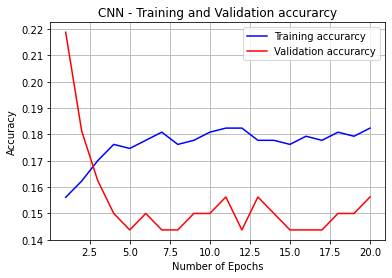

In [119]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN_Accuracy.png")

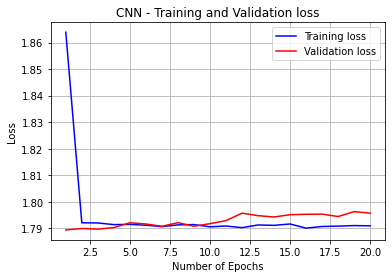

In [120]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN_Loss.png")


In [214]:
# Y_pred = model.predict(xtest)
# # #y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
# # y_pred = (Y_pred > 0.5) * 1.0
# # y_pred = y_pred.reshape(ytest.shape)
# print(Y_pred.shape)
# # y_pred.sum()
# print(Y_pred[10])
# y_pred = (Y_pred > 0.5) * 1.0
# y_pred = y_pred.reshape(ytest.shape)
# print(y_pred)


In [211]:
# #confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# y_pred=model.predict(xtest)
# y_pred_classes=np.argmax(y_pred,axis=1)
# y_true=np.argmax(ytest,axis=1)
# #compute conf mat
# conf_mat=confusion_matrix(y_true,y_pred_classes)
# #plot the con mat
# fruit_names=['fresh bananas',
#  'fresh oranges',
#  'rotten apples',
#  'fresh apples',
#  'rotten bananas',
#  'rotten oranges']
# f,ax=plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat,annot=True,fmt='.0f')
# ax.set_xticklabels(fruit_names)
# ax.set_yticklabels(fruit_names)
# plt.show()
# print(conf_mat)

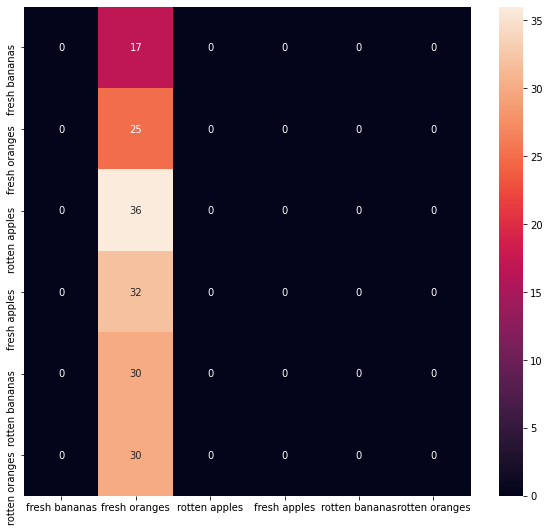

In [217]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [224]:
import sklearn.metrics as metrics
target_names = ['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
Y_pred = model.predict_generator(val_generator, 2513 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(val_generator.index_array, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(val_generator.index_array, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.01      1.00      0.01         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
# def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.figure(figsize=(10,10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = np.around(cm, decimals=2)
#         cm[np.isnan(cm)] = 0.0
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# ResNet50

In [123]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
#new_model.summary()
input_layer = layers.Input(shape=(200,200,3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()
last_layer = model2.output
flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)
new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()
for layer in new_model.layers[:-1]:
 layer.trainable=False
#new_model.summary()

In [124]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
y = to_categorical(y)
print(y.shape)
x = x/255


(849, 200, 200, 3)
(849,)
(849, 6)


In [125]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [126]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 7s 158ms/step - loss: 8.9087 - accuracy: 0.2596 - val_loss: 3.4797 - val_accuracy: 0.3529
Epoch 2/20
22/22 [==============================] - 3s 116ms/step - loss: 2.3202 - accuracy: 0.4474 - val_loss: 1.7913 - val_accuracy: 0.4118
Epoch 3/20
22/22 [==============================] - 3s 117ms/step - loss: 1.3831 - accuracy: 0.5460 - val_loss: 2.0351 - val_accuracy: 0.3765
Epoch 4/20
22/22 [==============================] - 3s 117ms/step - loss: 1.5471 - accuracy: 0.5578 - val_loss: 1.3988 - val_accuracy: 0.5059
Epoch 5/20
22/22 [==============================] - 3s 118ms/step - loss: 1.5062 - accuracy: 0.5848 - val_loss: 0.8350 - val_accuracy: 0.6235
Epoch 6/20
22/22 [==============================] - 3s 118ms/step - loss: 0.5881 - accuracy: 0.7781 - val_loss: 1.2819 - val_accuracy: 0.5118
Epoch 7/20
22/22 [==============================] - 3s 119ms/step - loss: 0.8413 - accuracy: 0.6626 - val_loss: 0.8718 - val_accuracy: 0.6118
Epoch 

#Plotting Model Accuracy and loss graph

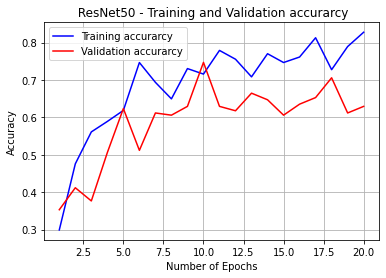

In [127]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title(' ResNet50 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/ResNet50_accuracy.png")

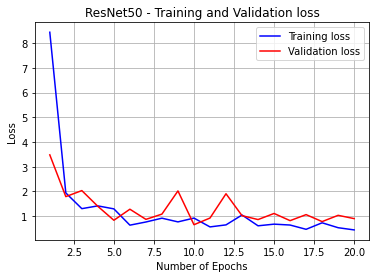

In [128]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('ResNet50 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/Resnet50_Loss.png")

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [227]:
# #confusion matrix
# y_pred=model2.predict(xtest)
# # y_pred_classes=np.argmax(y_pred,axis=1)
# y_true=np.argmax(ytest)
# #compute conf mat
# conf_mat=confusion_matrix(y_true,y_pred)

# print(conf_mat)
# #plot the con mat
# # fruit_names=['fresh bananas',
# #  'fresh oranges',
# #  'rotten apples',
# #  'fresh apples',
# #  'rotten bananas',
# #  'rotten oranges']
# # f,ax=plt.subplots(figsize=(10,9))
# # sns.heatmap(conf_mat,annot=True,fmt='.0f')
# # ax.set_xticklabels(fruit_names)
# # ax.set_yticklabels(fruit_names)
# # plt.show()

# VGG16

In [130]:
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')

In [131]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [132]:
from keras.utils.vis_utils import plot_model

In [133]:
#plot_model(model3, to_file='vgg.png')

In [134]:
input_layer = layers.Input(shape=(200,200,3))

In [135]:
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)

In [136]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [137]:

last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [138]:
new_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [139]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [140]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 4s 144ms/step - loss: 1.3505 - accuracy: 0.5064 - val_loss: 0.3071 - val_accuracy: 0.8941
Epoch 2/20
22/22 [==============================] - 3s 137ms/step - loss: 0.1568 - accuracy: 0.9532 - val_loss: 0.2086 - val_accuracy: 0.9353
Epoch 3/20
22/22 [==============================] - 3s 137ms/step - loss: 0.0729 - accuracy: 0.9810 - val_loss: 0.1940 - val_accuracy: 0.9235
Epoch 4/20
22/22 [==============================] - 3s 136ms/step - loss: 0.0439 - accuracy: 0.9974 - val_loss: 0.1879 - val_accuracy: 0.9294
Epoch 5/20
22/22 [==============================] - 3s 137ms/step - loss: 0.0304 - accuracy: 0.9975 - val_loss: 0.1838 - val_accuracy: 0.9235
Epoch 6/20
22/22 [==============================] - 3s 137ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 0.9000
Epoch 7/20
22/22 [==============================] - 3s 138ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.9235
Epoch 

# Plotting Model Accuracy and Loss

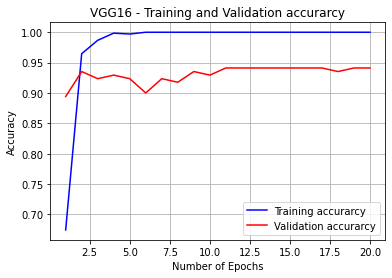

In [141]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG16 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Accuracy.png")

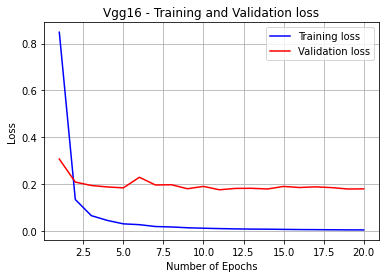

In [142]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Vgg16 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Loss.png")

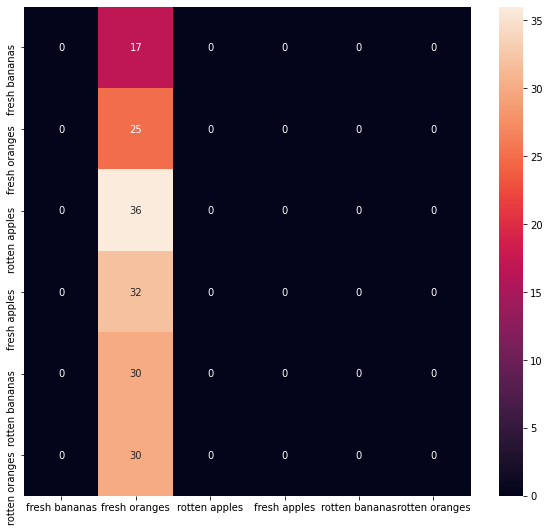

In [143]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

#VGG 19


In [144]:
from keras.applications.vgg19 import VGG19
model4 = VGG19(weights='imagenet')

In [145]:
#print(model3.summary())

In [146]:
input_layer = layers.Input(shape=(200,200,3))
model4 = VGG19(weights='imagenet',include_top=False,input_tensor=input_layer)


In [147]:
#print(model3.summary())

In [148]:

last_layer = model4.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [149]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 4s 178ms/step - loss: 1.4499 - accuracy: 0.5162 - val_loss: 0.5631 - val_accuracy: 0.7765
Epoch 2/20
22/22 [==============================] - 4s 168ms/step - loss: 0.2685 - accuracy: 0.8931 - val_loss: 0.2944 - val_accuracy: 0.8706
Epoch 3/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0978 - accuracy: 0.9824 - val_loss: 0.1997 - val_accuracy: 0.9412
Epoch 4/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0531 - accuracy: 0.9927 - val_loss: 0.1825 - val_accuracy: 0.9412
Epoch 5/20
22/22 [==============================] - 4s 169ms/step - loss: 0.0405 - accuracy: 0.9971 - val_loss: 0.2129 - val_accuracy: 0.9118
Epoch 6/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0298 - accuracy: 0.9977 - val_loss: 0.2013 - val_accuracy: 0.9118
Epoch 7/20
22/22 [==============================] - 4s 169ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.9412
Epoch 

#Plotting Model Accuracy and Loss

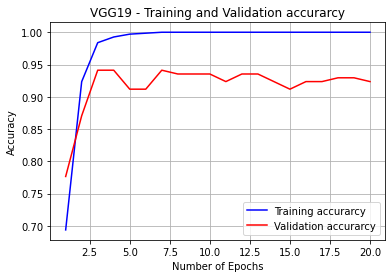

In [150]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG19 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Accuracy.png")

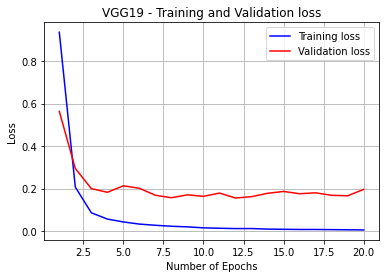

In [151]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('VGG19 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Loss.png")

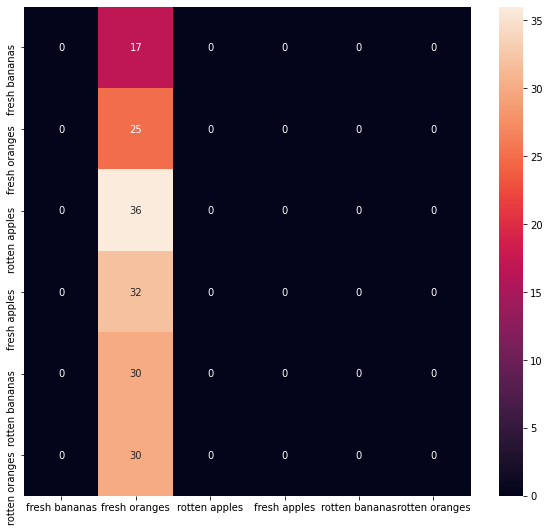

In [152]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

#InceptionResNetV2

In [153]:
import tensorflow as tf

In [154]:
input_layer = layers.Input(shape=(200,200,3))
model5 = tf.keras.applications.InceptionResNetV2(weights='imagenet',
    include_top=False,input_tensor=input_layer)

In [155]:
#model5.summary()

In [156]:

last_layer = model5.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 15s 322ms/step - loss: 1.7878 - accuracy: 0.6682 - val_loss: 0.6717 - val_accuracy: 0.9118
Epoch 2/20
22/22 [==============================] - 4s 167ms/step - loss: 0.3416 - accuracy: 0.9438 - val_loss: 0.3424 - val_accuracy: 0.9588
Epoch 3/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.2078 - val_accuracy: 0.9529
Epoch 4/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0431 - accuracy: 0.9938 - val_loss: 0.1767 - val_accuracy: 0.9529
Epoch 5/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0926 - accuracy: 0.9747 - val_loss: 0.2994 - val_accuracy: 0.9471
Epoch 6/20
22/22 [==============================] - 4s 169ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.2924 - val_accuracy: 0.9588
Epoch 7/20
22/22 [==============================] - 4s 170ms/step - loss: 0.0233 - accuracy: 0.9941 - val_loss: 0.3209 - val_accuracy: 0.9588
Epoch

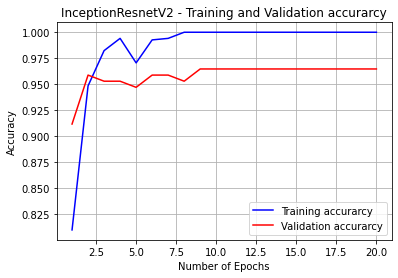

In [157]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('InceptionResnetV2 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Accuracy.png")

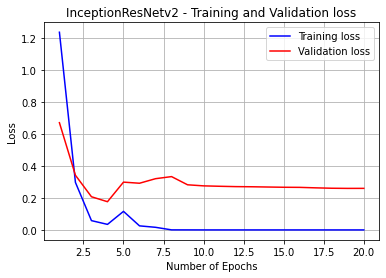

In [158]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('InceptionResNetv2 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Loss.png")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


ValueError: ignored